### Los Angeles, California

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

I have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [50]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [51]:
# Display basic information about the dataframe
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [52]:
# Display summary statistics for numerical columns
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


In [53]:
# Check for missing values
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [54]:
# Display the first few rows of the dataframe
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [55]:
# Display the last few rows of the dataframe
crimes.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,0900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,NaN,Invest Cont,14500 HARTLAND ST


In [56]:
# Check the distribution of categorical variables
for column in crimes.select_dtypes(include=['object']).columns:
    print(crimes[column].value_counts())
    print("\n")

1200    6462
1800    3991
2000    3769
1700    3754
0001    3587
        ... 
2332       4
2259       3
0511       3
0528       3
0531       3
Name: TIME OCC, Length: 1439, dtype: int64


Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: AREA NAME, dtype: int64


THEFT OF IDENTITY                                     22670
BATTERY - SIMPLE ASSAULT                              19694
BURGLARY FROM VEHICLE                                 13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        13215
INTIMATE PARTNER - SIMPLE ASSAULT                     11981
                                       

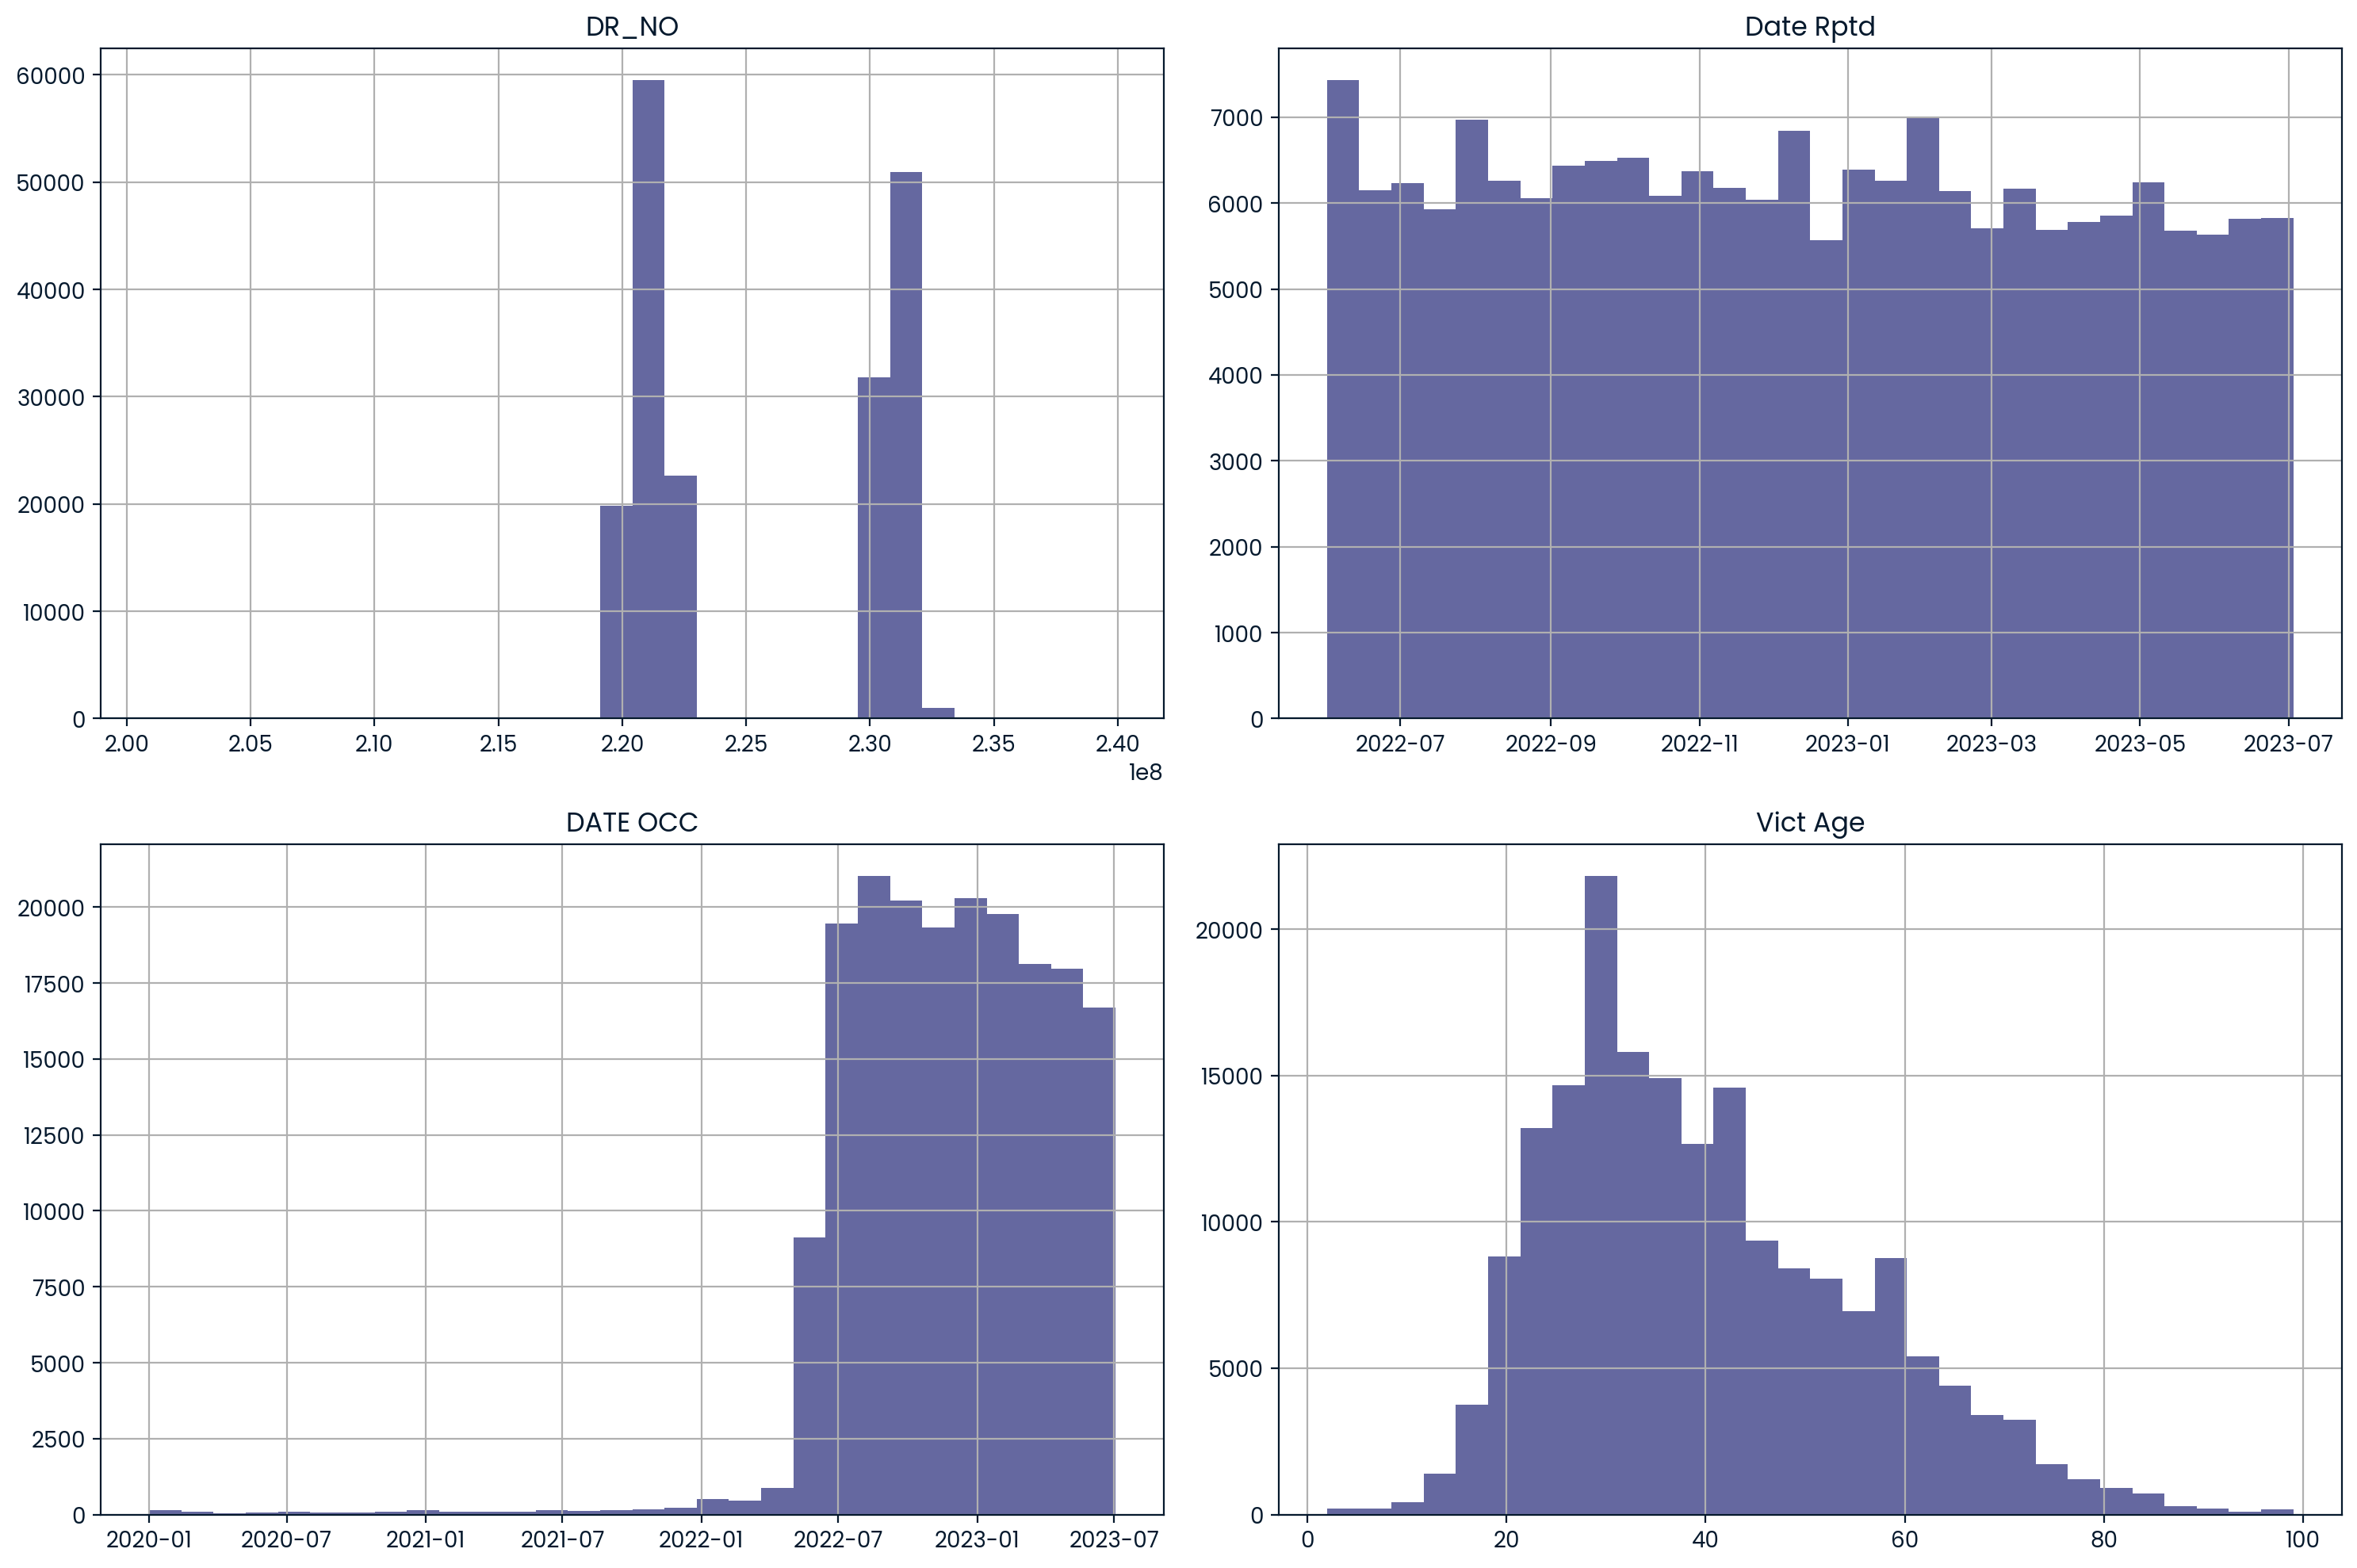

In [57]:
# Visualize the distribution of numerical variables
crimes.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

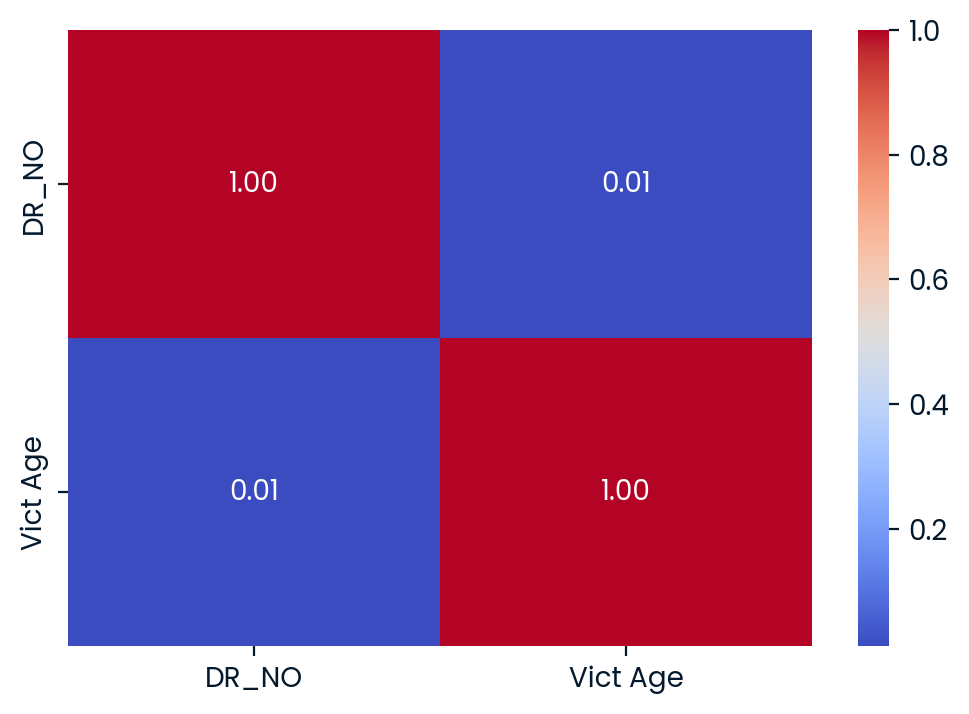

In [58]:
# Visualize correlations between numerical variables
plt.figure(figsize=(6, 4))
sns.heatmap(crimes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

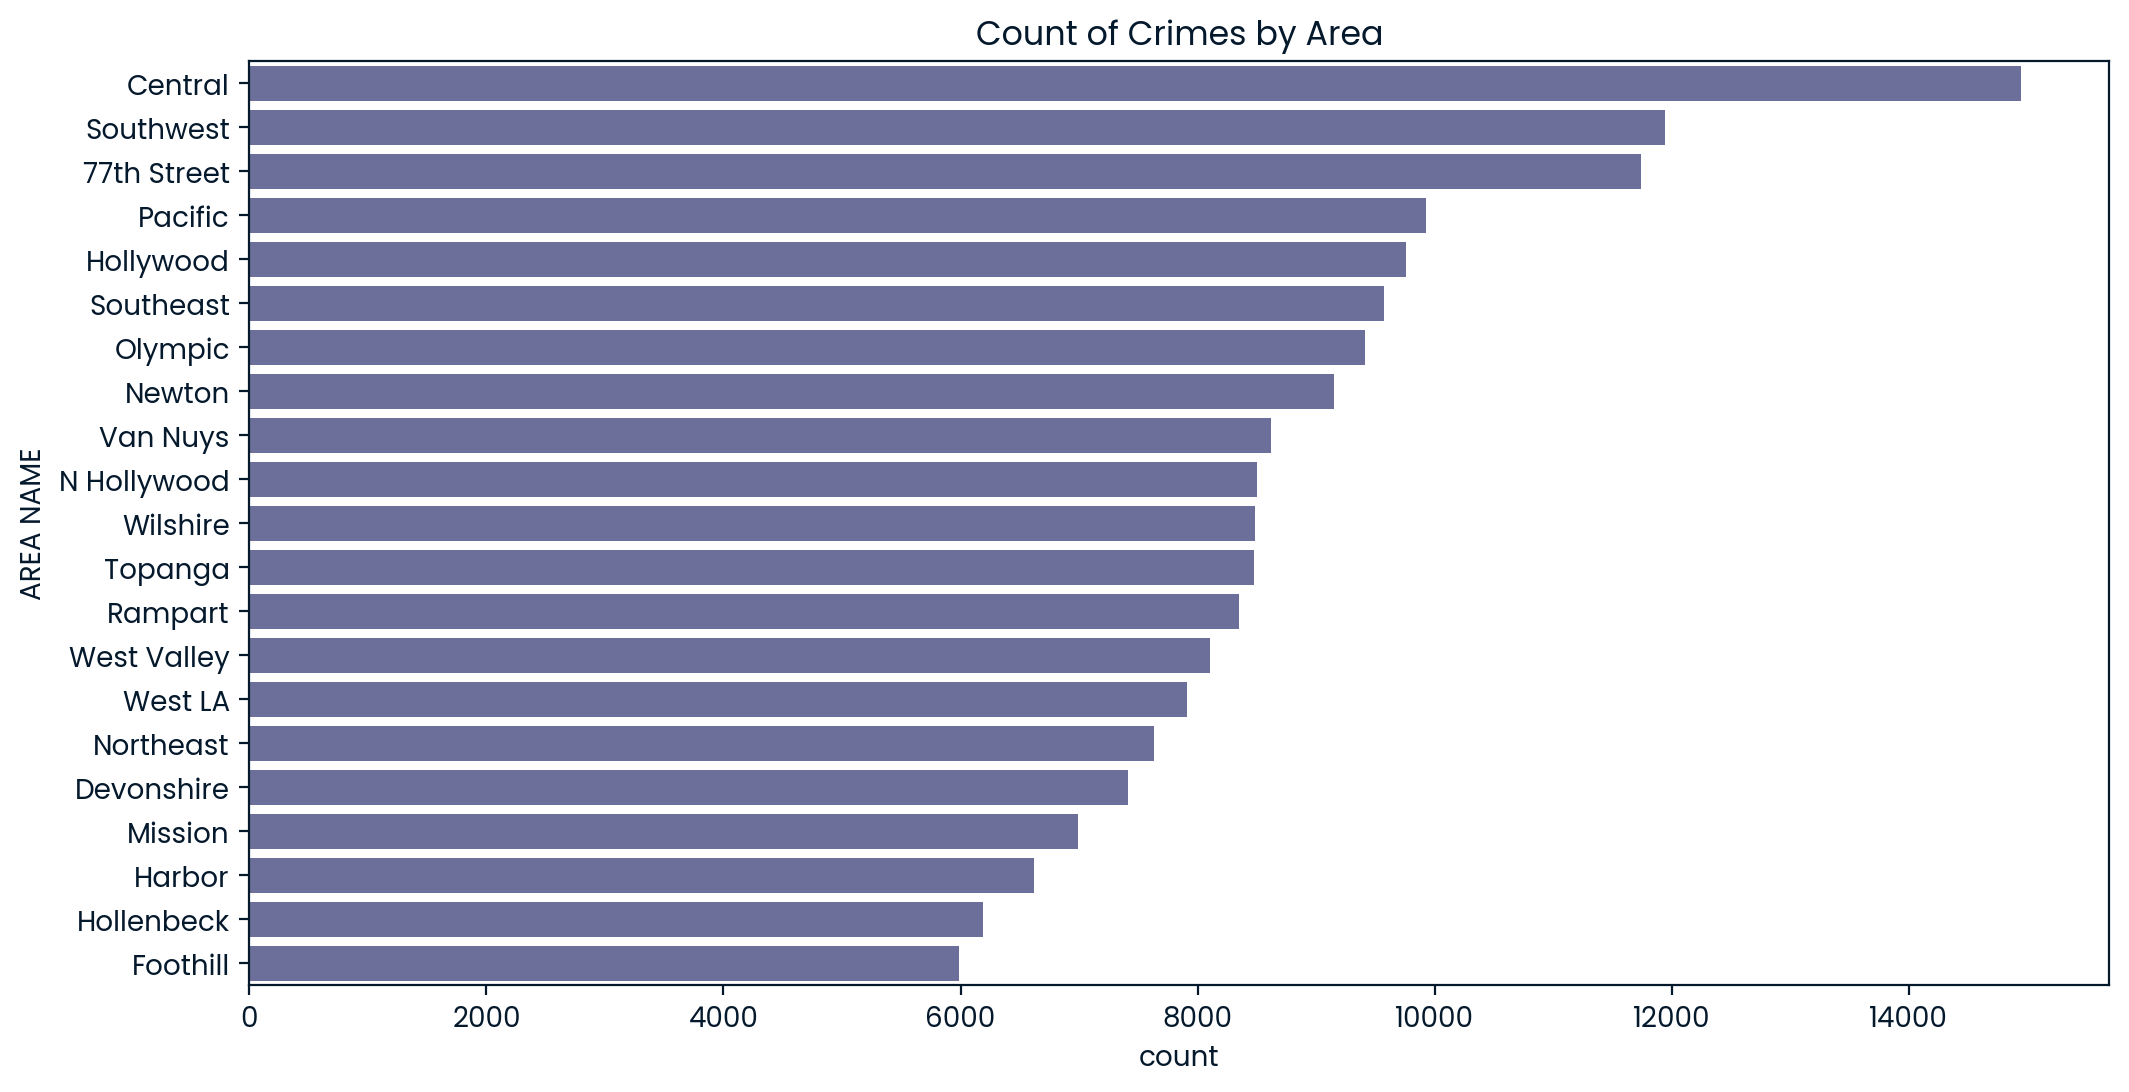

In [59]:
# Visualize the count of crimes by area
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, y='AREA NAME', order=crimes['AREA NAME'].value_counts().index)
plt.title('Count of Crimes by Area')
plt.show()

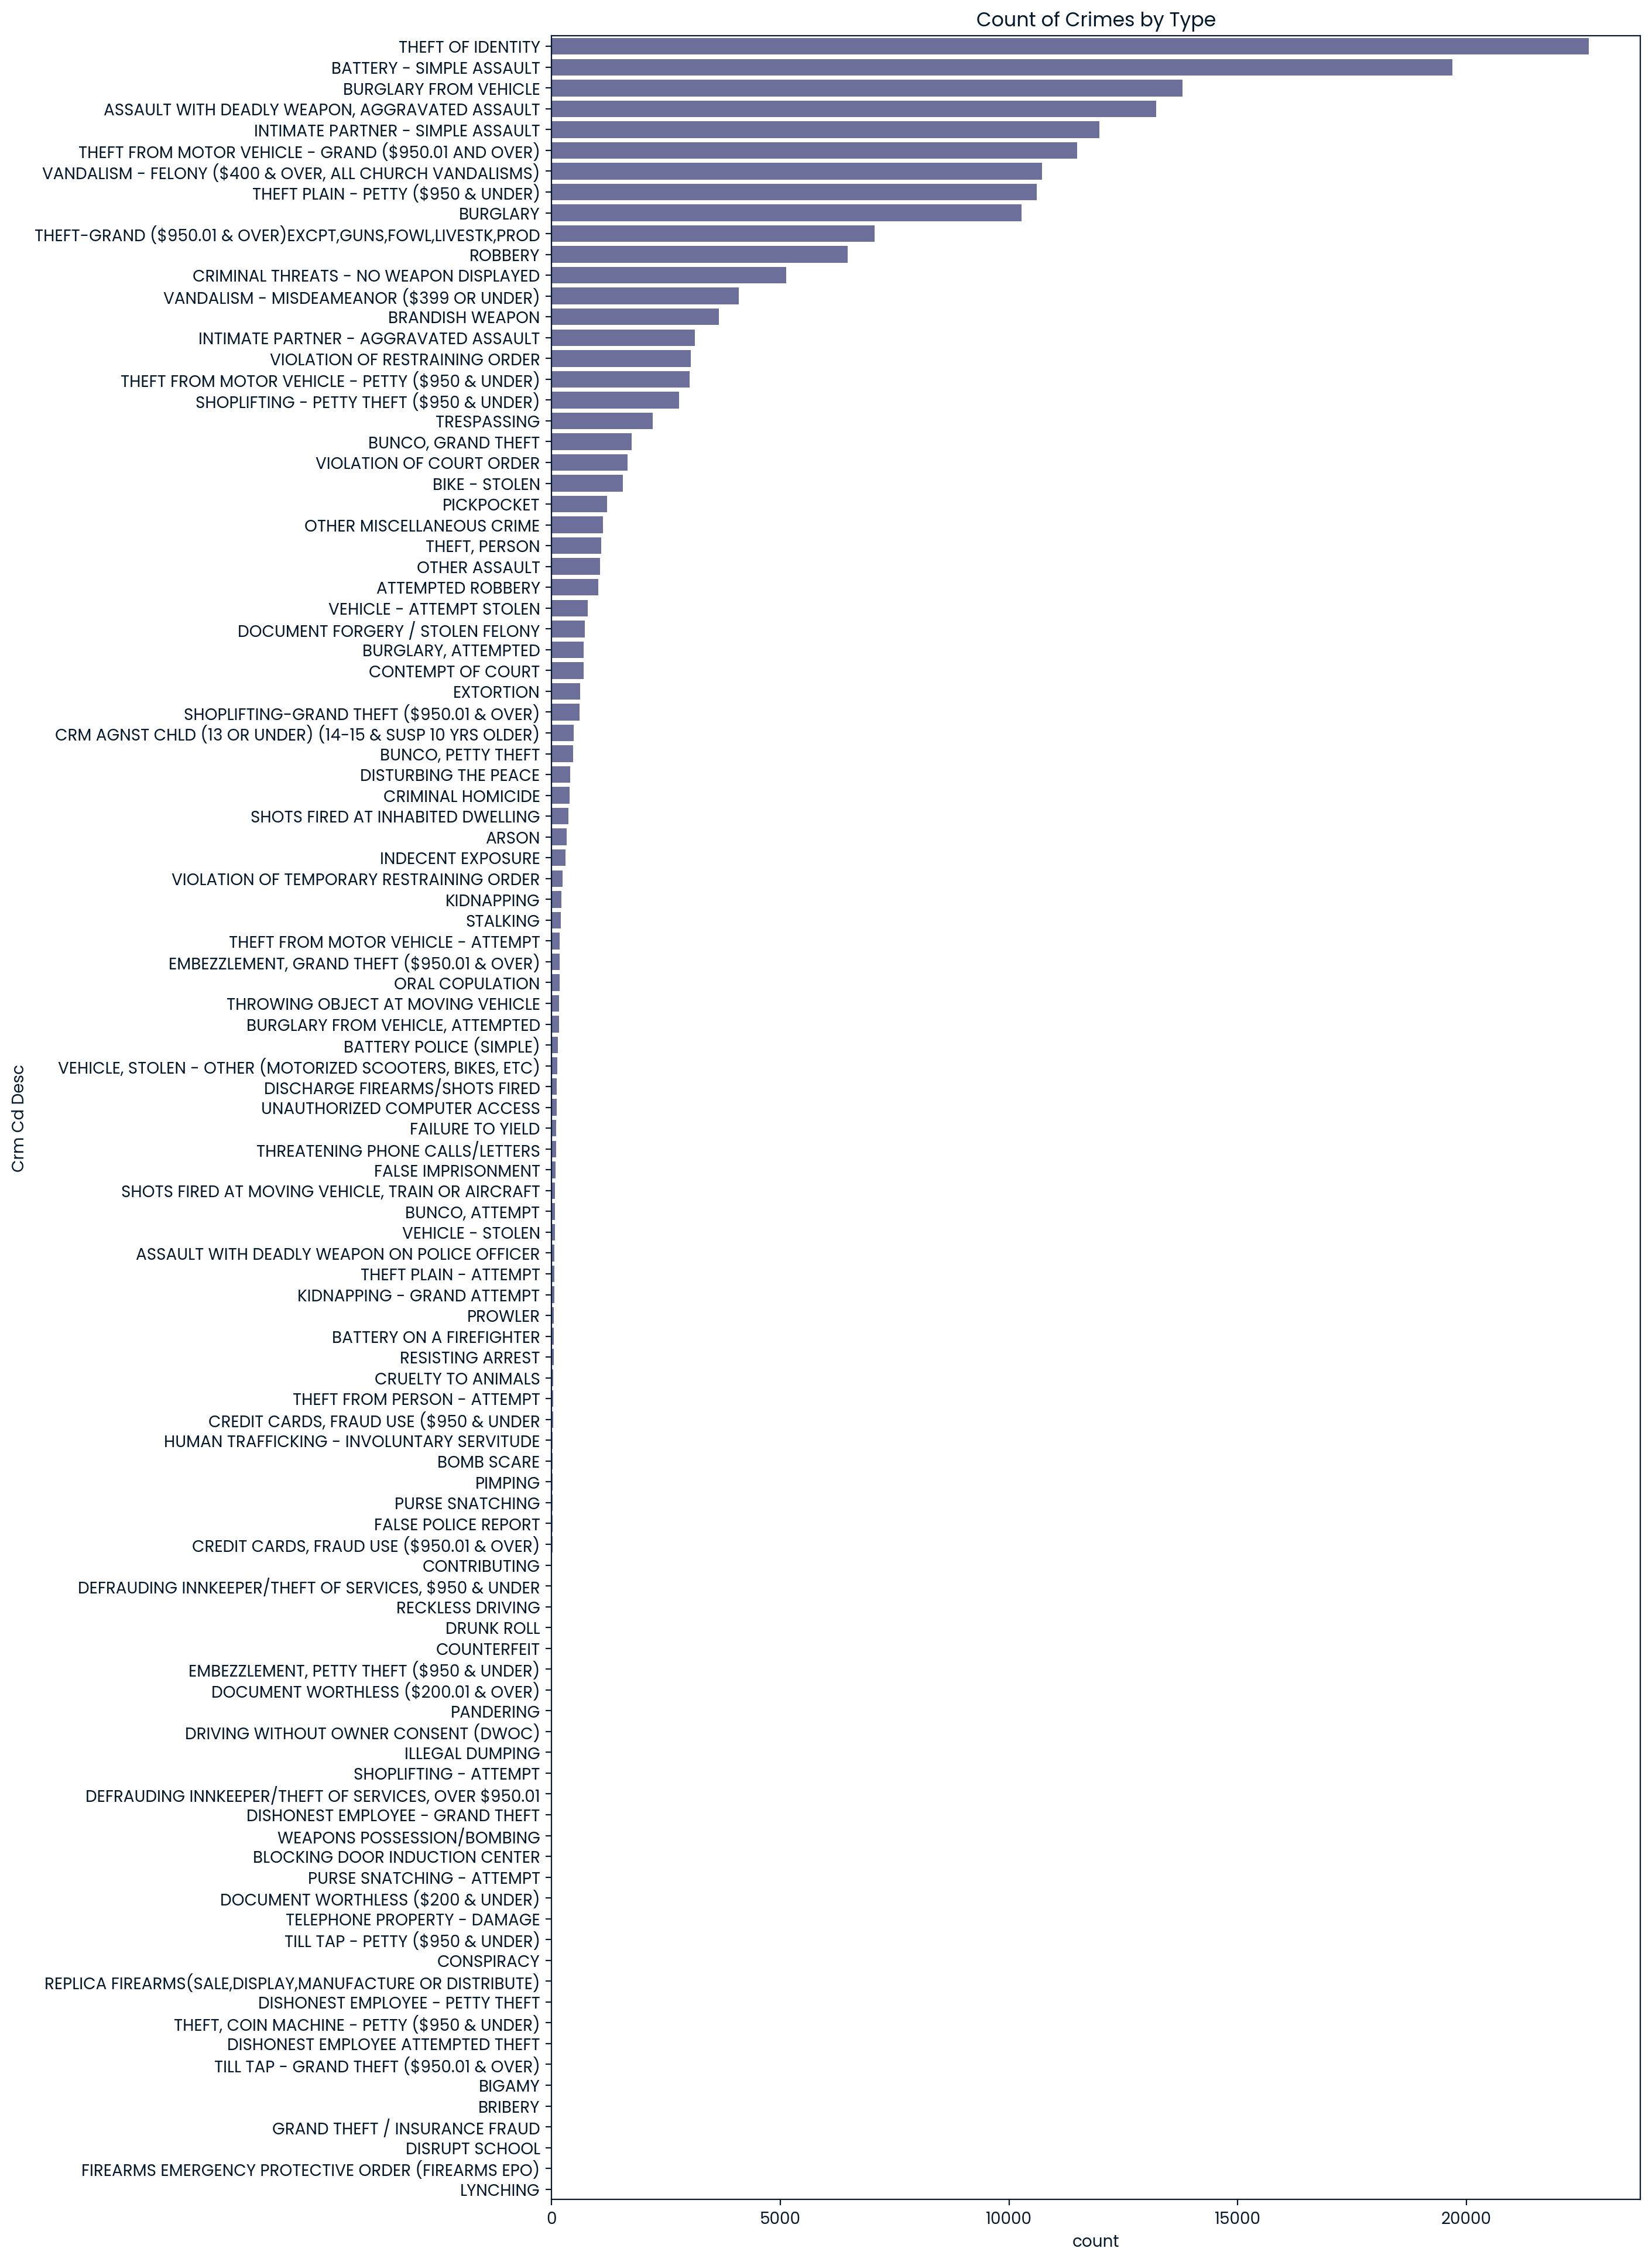

In [60]:
# Visualize the count of crimes by type
plt.figure(figsize=(12, 24))
sns.countplot(data=crimes, y='Crm Cd Desc', order=crimes['Crm Cd Desc'].value_counts().index)
plt.title('Count of Crimes by Type')
plt.show()

In [61]:
# Extract the hour from TIME OCC
crimes['HOUR'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M').dt.hour

# View the result
print(crimes)

            DR_NO  Date Rptd  ...                                  LOCATION HOUR
0       220314085 2022-07-22  ...   2500 S  SYCAMORE                     AV   11
1       222013040 2022-08-06  ...   3300    SAN MARINO                   ST   16
2       220614831 2022-08-18  ...                         1900    TRANSIENT   12
3       231207725 2023-02-27  ...   6200    4TH                          AV    6
4       220213256 2022-07-14  ...   1200 W  7TH                          ST    9
...           ...        ...  ...                                       ...  ...
185710  231510379 2023-05-29  ...   5300    DENNY                        AV   11
185711  231604807 2023-01-27  ...  12500    BRANFORD                     ST   18
185712  231606525 2023-03-22  ...  12800    FILMORE                      ST   10
185713  231210064 2023-04-12  ...   6100 S  VERMONT                      AV   16
185714  230906458 2023-03-05  ...  14500    HARTLAND                     ST    9

[185715 rows x 13 columns]


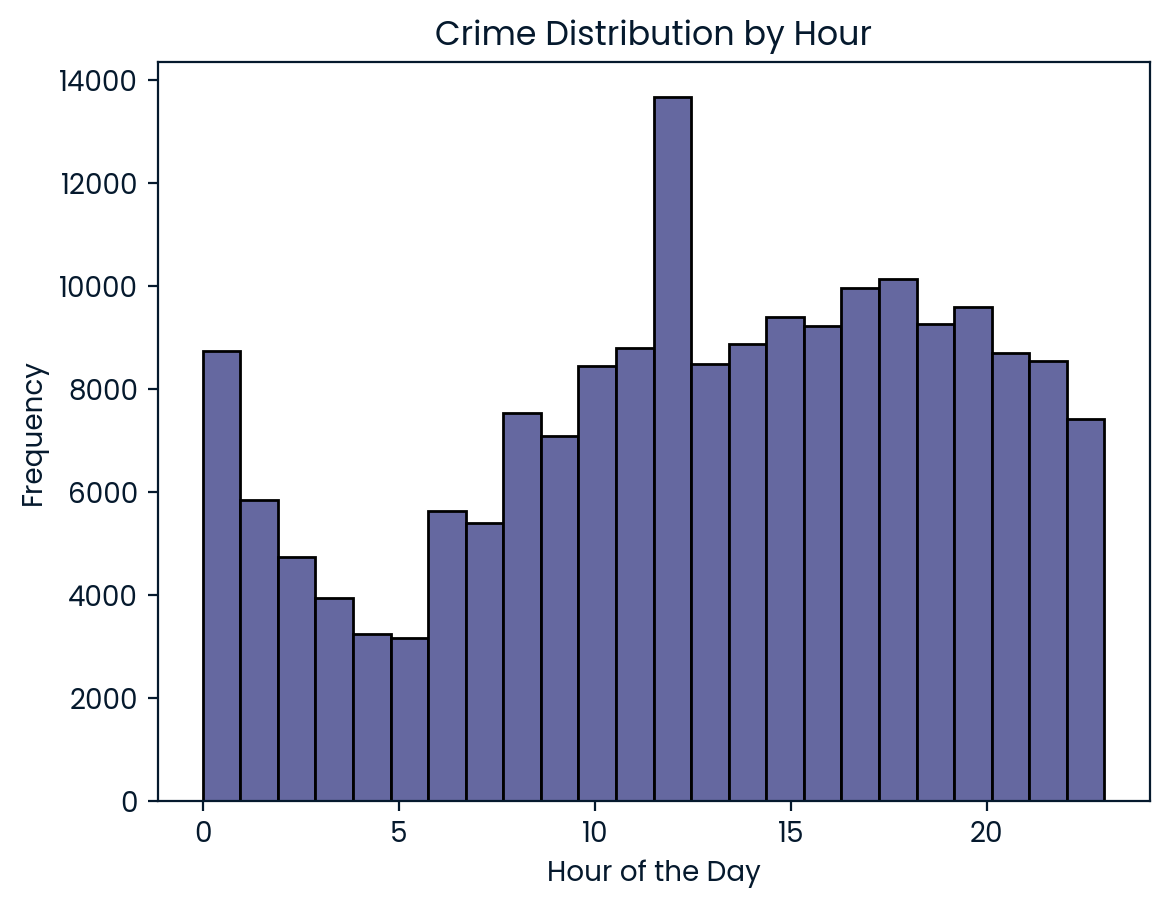

In [62]:
# Visualize the distribution of crime by hour
plt.hist(crimes['HOUR'], bins=24, edgecolor='k')
plt.title('Crime Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['HOUR'].value_counts().idxmax()

# Display the result
print(f"The hour with the most crimes is: {peak_crime_hour}")

The hour with the most crimes is: 12


In [64]:
# Define night hours of 10 PM (22) to 3:59 AM (3)
night_crimes = crimes[(crimes['HOUR'] >= 22) | (crimes['HOUR'] <= 3)]

# Find the area with the largest frequency of night crimes
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

# Print the result
print(f"The area with the most night crimes is: {peak_night_crime_location}")

The area with the most night crimes is: Central


In [65]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, 150]  # Use 150 as an upper limit for age
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Bin the ages into groups based on 'Vict Age'
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# Count the number of crimes for each age group
victim_ages = crimes['Age Group'].value_counts().reindex(age_labels, fill_value=0)

# Display the result
print(victim_ages)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64


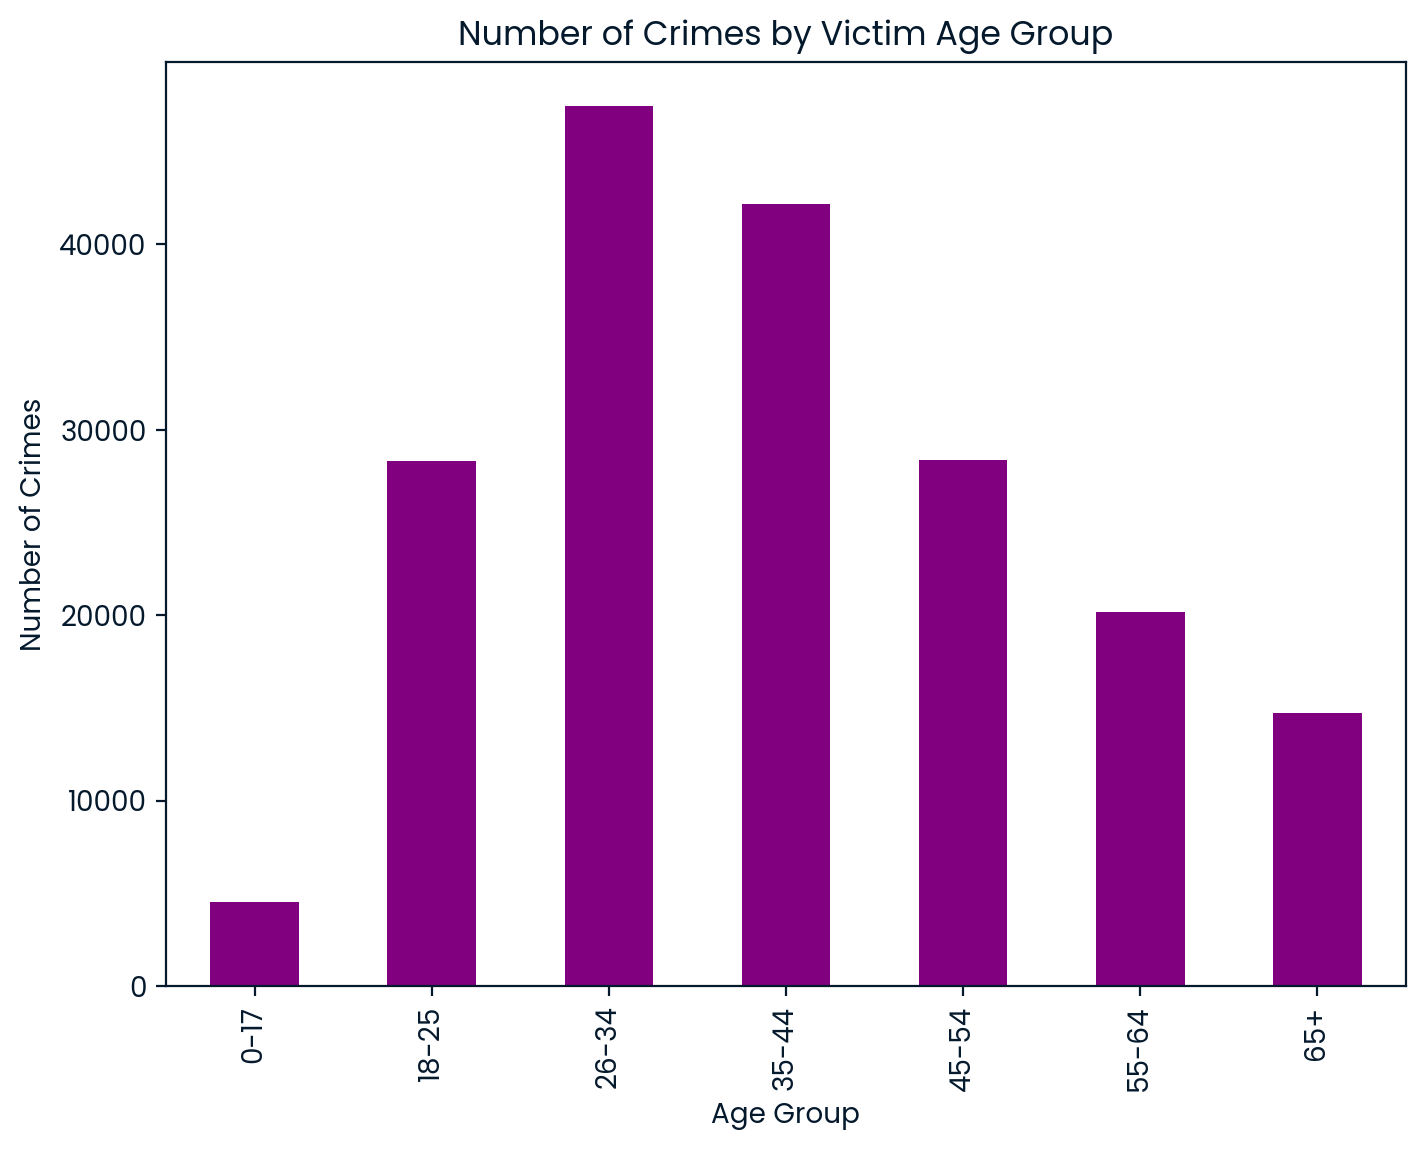

In [66]:
# Visualize the distribution of victims by age
victim_ages.plot(kind='bar', color='purple', figsize=(8, 6))

# Add titles and labels
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')

# Display the plot
plt.show()